# Supervised Learning Algorithm Comparison Exercise
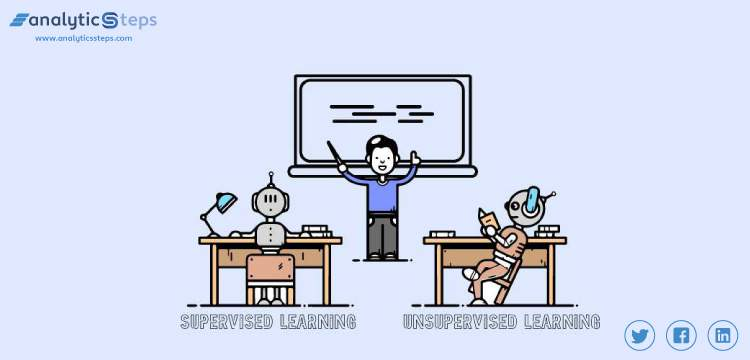

LR: 0.945121 (0.031251)
LDA: 0.947343 (0.036698)
KNN: 0.916570 (0.041193)
CART: 0.925362 (0.034030)
NB: 0.936377 (0.042049)
SVM: 0.626329 (0.004106)


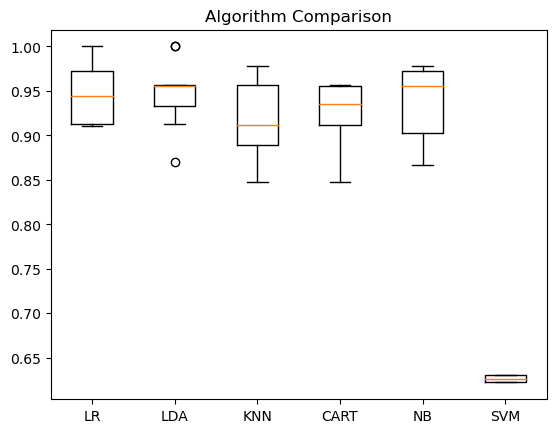

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

breast_cancer_data = datasets.load_breast_cancer()
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 1. We've already done labs covering KNN and CART (decision tree). In a few sentences, explain each of the other algorithms above (LR, LDA, NB, SVM).

LR: Logistic regression algorithmns can classify tasks where the goal is to identify the probability of an instance belongs to a certain class.

LDA: Linear discriminant analysis is a technique used to find a linear combination of features that best separates that classes in a dataset.

NB: Naive Bayes is a supervised machine learning technique that classified tasks, for instance text classificiation while assuming features are independent.

SVM: Support Vector Machine are particularly good for solving binary classification problems that involve classifying elements of a data set into groups.

#### 2. Rerun supervised learning comparison.

Find another dataset for which we could compare supervised learning techniques. Remember that the dataset must have a single output for which we want to train and build a model. For example, given a bunch of input parameters, would a person likely be granted a loan.

Next, implement the algorithms above for your chosen dataset. Try a few different variants of some of the algorithms. For example, in the kNN algorithm, you could specify a maximum depth. 


In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


LR: 0.762295 (0.046575)
LDA: 0.765627 (0.060664)
KNN: 0.714754 (0.057797)
CART: 0.674405 (0.025379)
NB: 0.763882 (0.036419)
SVM: 0.653120 (0.005458)


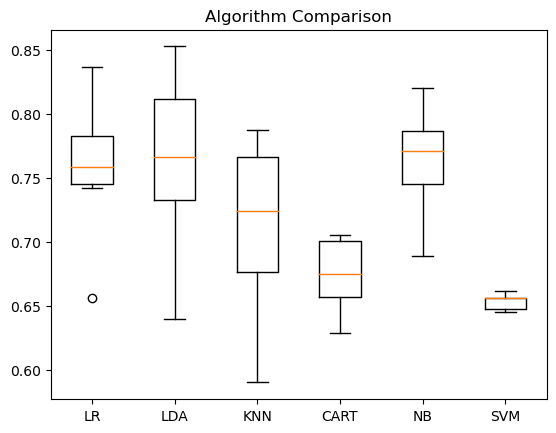

In [6]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 3. How do the results compare? Was there an algorithm that consistently outperformed or underperformed?


All of the supervised machine learning algorithms performed worse with the diabetes dataset versus with the already-implemented breast cancer dataset. The only exception is the Support Vector Machine, which stayed consistently bad. 